In [ ]:
## Creating code to investigate the original data set of impression
import pandas as pd
# Load the DataFrame
file = "DT456E_15IQR_cleaned_atoms-24-Apr-2024.pkl"

df = pd.read_pickle(file)
# Display the first 10 rows

print(df.head(5))

## There are 18116 unique carbon containing molecules. 
## There are 5976 unique sulfur containing molecules
print((5976/18116)*100)
print((75/5976)*100)

from collections import defaultdict

# Create a dictionary to store unique molecule names for each element
element_molecule_sets = defaultdict(set)

'''This is code to interate through the training database of the OG impression'''

# Iterate through the dataframe to get molecule names for the elements found
for _, row in df.iterrows():
    element = row["typestr"]
    molecule = row["molecule_name"]
    element_molecule_sets[element].add(molecule)

# Convert sets to counts and print results
for element, molecules in element_molecule_sets.items():
    print(f"Number of unique molecules containing {element}: {len(molecules)}")

# Function to count molecules containing all specified elements
def count_molecules_with_elements(elements):
    # Start with the set of molecules for the first element
    common_molecules = element_molecule_sets[elements[0]].copy()
    
    for element in elements[1:]:
        common_molecules &= element_molecule_sets[element]

    return len(common_molecules), common_molecules

# Count molecules containing both N and O (can be anything)
elements_to_check = ["N", "O"]
num_common, common_molecules = count_molecules_with_elements(elements_to_check)
print(f"Number of molecules containing both {elements_to_check}: {num_common}")






  molecule_name  atom_index typestr  typeint       x       y       z  \
0   D7117390126           0       C        6 -1.3870  0.3634 -0.0875   
1   D7117390126           1       C        6 -0.4160 -0.2244 -0.8509   
2   D7117390126           2       N        7 -2.6412 -0.1284  0.1420   
3   D7117390126           3       C        6 -0.7451 -1.4466 -1.5320   
4   D7117390126           4       C        6  0.9728  0.3567 -0.9642   

                                                conn       shift  is_outlier  
0  [0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...  150.180464       False  
1  [2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  101.457823       False  
2  [1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, ... -185.666042       False  
3  [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, ...  155.590673       False  
4  [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, ...   26.752327       False  
32.987414440273795
1.2550200803212852
Number of unique molecules containing C: 18116
Number o

In [ ]:
from collections import defaultdict

# Define the elements to check (excluding C and H)
elements_to_check = {"O", "N", "P", "Cl", "F", "Br", "Si"}

# Create a dictionary to store unique molecule names for each element
element_molecule_sets = defaultdict(set)

# Iterate through the dataframe to collect molecule names for each element
for _, row in df.iterrows():
    element = row["typestr"]
    molecule = row["molecule_name"]
    element_molecule_sets[element].add(molecule)

# Get the set of molecules that contain sulfur (S)
sulfur_molecules = element_molecule_sets["S"]

# Dictionary to count how many sulfur molecules contain each additional element
sulfur_combinations = {el: 0 for el in elements_to_check}

# Count sulfur molecules that also contain each other element
for element in elements_to_check:
    sulfur_combinations[element] = len(sulfur_molecules & element_molecule_sets[element])

# Print results
print(f"Total number of molecules containing sulfur (S): {len(sulfur_molecules)}")
for element, count in sulfur_combinations.items():
    print(f"Number of sulfur molecules that also contain {element}: {count}")


## This code just gives this output:
'''
Total number of molecules containing sulfur (S): 5976
Number of sulfur molecules that also contain F: 1095
Number of sulfur molecules that also contain O: 5246
Number of sulfur molecules that also contain Br: 243
Number of sulfur molecules that also contain Cl: 833
Number of sulfur molecules that also contain Si: 11
Number of sulfur molecules that also contain N: 5589
Number of sulfur molecules that also contain P: 53
'''


'\nTotal number of molecules containing sulfur (S): 5976\nNumber of sulfur molecules that also contain F: 1095\nNumber of sulfur molecules that also contain O: 5246\nNumber of sulfur molecules that also contain Br: 243\nNumber of sulfur molecules that also contain Cl: 833\nNumber of sulfur molecules that also contain Si: 11\nNumber of sulfur molecules that also contain N: 5589\nNumber of sulfur molecules that also contain P: 53\n'

In [4]:
import pandas as pd

# Load the DataFrame
file = "TROY_test_predicted_atoms.pkl"
df = pd.read_pickle(file)

# Display the first 10 rows
print(df.head(50))


    index molecule_name  atom_index typestr  typeint       x       y       z  \
0       0           110           0       S       16 -5.7938 -0.0966 -0.0866   
1       1           110           1       C        6 -4.0233  0.0776 -0.1122   
2       2           110           2       O        8 -6.3640  1.1790 -0.4645   
3       3           110           3       O        8 -6.1209 -1.3375 -0.7564   
4       4           110           4       C        6  0.2052  0.5352 -0.0492   
5       5           110           5       C        6  1.1446 -0.4276 -0.0394   
6       6           110           6       N        7 -6.2275 -0.3231  1.5021   
7       7           110           7       C        6  5.4296 -0.0415  0.0576   
8       8           110           8       N        7  6.7956  0.0680  0.1067   
9       9           110           9       C        6 -3.4536  1.3389  0.0093   
10     10           110          10       C        6 -3.2210 -1.0539 -0.2365   
11     11           110          11     

In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Paths to folders
exp_folder = r"C:\Project_code\OUTPUT\10%"
pred_folder = r"C:\Project_code\OUTPUT\Impressioned"

# Function to extract NMREDATA_ASSIGNMENT data from an SDF file
def extract_assignment_data(file_path):
    """Extracts NMREDATA_ASSIGNMENT data from an SDF file."""
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    start_idx = next((i for i, line in enumerate(lines) if "> <NMREDATA_ASSIGNMENT>" in line), None)
    end_idx = next((i for i, line in enumerate(lines) if "> <NMREDATA_J>" in line), None)

    if start_idx is None or end_idx is None:
        return []

    data_lines = lines[start_idx + 1:end_idx]
    
    extracted_data = []
    for line in data_lines:
        values = line.strip().strip("\\").split(",")
        if len(values) >= 2:
            try:
                first_val = int(values[0].strip())  # Atom index
                second_val = float(values[1].strip())  # NMR shift
                extracted_data.append((first_val, second_val))
            except ValueError:
                continue  

    return extracted_data

# Get list of molecule files in experimental folder
exp_files = [f for f in os.listdir(exp_folder) if f.endswith(".sdf")]

# Store data for RMSE calculation
rmse_before = {}
rmse_after = {}

for exp_file in exp_files:
    pred_file = exp_file.replace(".nmredata.sdf", ".nmredata_predicted.sdf")
    pred_path = os.path.join(pred_folder, pred_file)
    exp_path = os.path.join(exp_folder, exp_file)

    if not os.path.exists(pred_path):
        print(f"Predicted file missing: {pred_file}")
        continue

    exp_data = extract_assignment_data(exp_path)
    pred_data = extract_assignment_data(pred_path)

    min_length = min(len(exp_data), len(pred_data))

    errors_before = []
    errors_after = []

    for i in range(min_length):
        exp_value = exp_data[i][1]
        pred_value = pred_data[i][1]

        if exp_value != 0.0:
            errors_before.append(abs(exp_value - pred_value) / exp_value)
        if pred_value != 0.0:
            errors_after.append(abs(exp_value - pred_value) / pred_value)

    molecule_name = exp_file.replace(".nmredata.sdf", "").replace("molecule_", "")
    
    if errors_before:
        rmse_before[molecule_name] = np.sqrt(np.mean(np.array(errors_before) ** 2))
    if errors_after:
        rmse_after[molecule_name] = np.sqrt(np.mean(np.array(errors_after) ** 2))

# Convert to DataFrame for analysis
rmse_before_df = pd.DataFrame(list(rmse_before.items()), columns=["molecule_name", "RMSE_before"])
rmse_after_df = pd.DataFrame(list(rmse_after.items()), columns=["molecule_name", "RMSE_after"])

# Merge results
rmse_results = pd.merge(rmse_before_df, rmse_after_df, on="molecule_name", how="outer")

# Calculate change in RMSE
rmse_results["RMSE_change"] = rmse_results["RMSE_before"] - rmse_results["RMSE_after"]

# Display or save the results
print(rmse_results)
# rmse_results.to_csv("rmse_comparison.csv", index=False)


  molecule_name  RMSE_before  RMSE_after  RMSE_change
0           105     0.447810    0.027319     0.420492
1           107     0.534810    0.020276     0.514534
2           110     0.358362    0.015878     0.342484
3           111     0.426574    0.013588     0.412985
4            12     0.378387    0.020326     0.358060
5            42     0.453100    0.014474     0.438626
6            43     0.322745    0.045950     0.276795
7             8     0.501728    0.047124     0.454604
8            89     0.562110    0.015561     0.546549


Molecules in first dataset: ['105', '107', '110', '111', '12', '42', '43', '8', '89']
Molecules in second dataset: ['110', '12', '42', '105', '8', '43', '107', '89', '111']

Molecule: 110
Atom indices in first dataset: [2, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
Atom indices in second dataset: [2, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


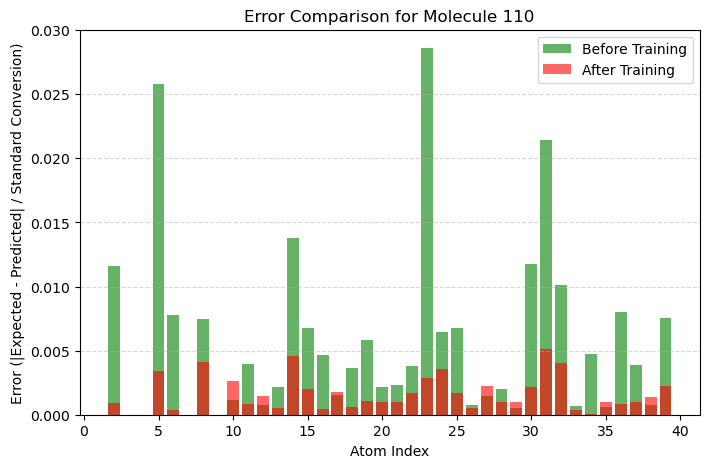


Molecule: 12
Atom indices in first dataset: [1, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
Atom indices in second dataset: [1, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]


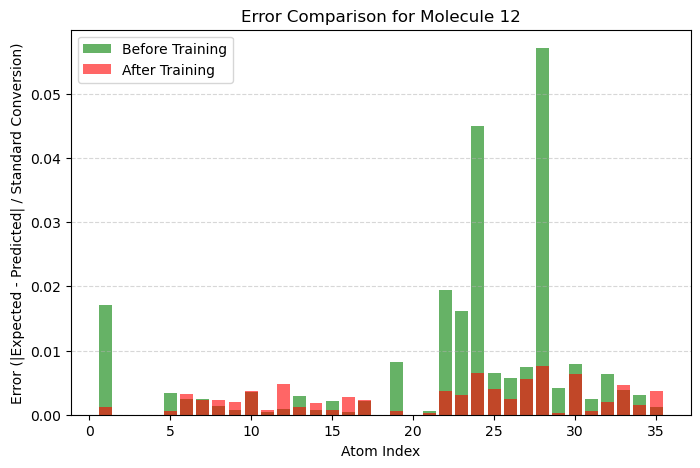


Molecule: 42
Atom indices in first dataset: [3, 4, 5, 6, 7, 12, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
Atom indices in second dataset: [3, 4, 5, 6, 7, 12, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


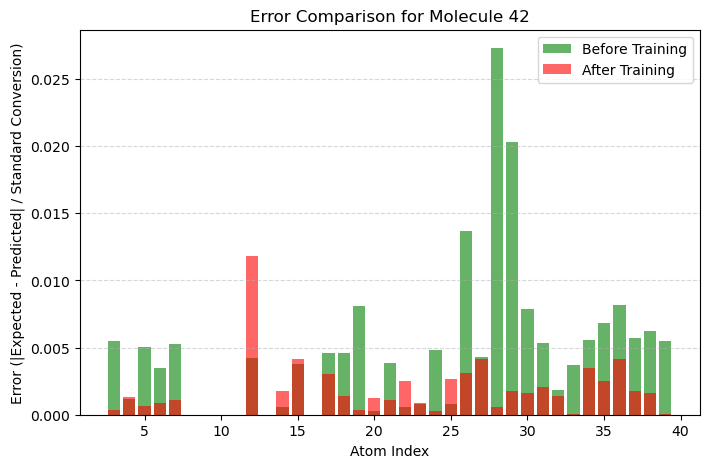


Molecule: 105
Atom indices in first dataset: [1, 2, 3, 4, 5, 6, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
Atom indices in second dataset: [1, 2, 3, 4, 5, 6, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


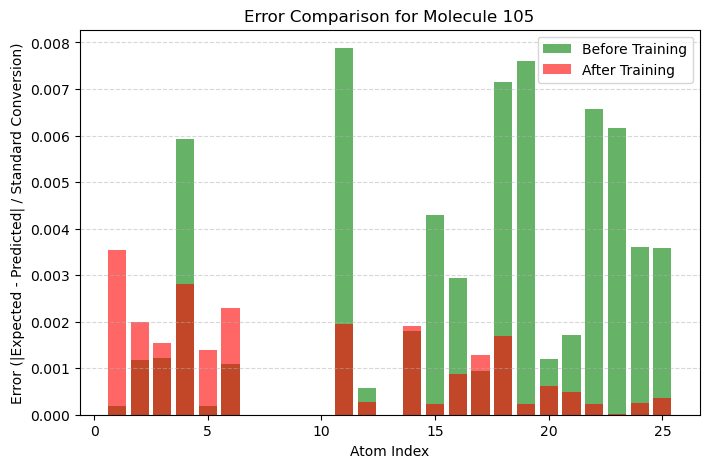


Molecule: 8
Atom indices in first dataset: [2, 4, 5, 6, 8, 10, 11, 12, 14, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]
Atom indices in second dataset: [2, 4, 5, 6, 8, 10, 11, 12, 14, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]


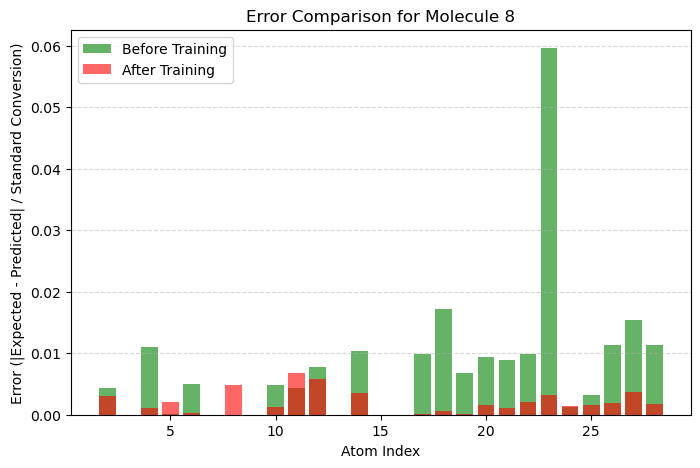


Molecule: 43
Atom indices in first dataset: [2, 3, 5, 6, 7, 8, 9, 10, 12, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Atom indices in second dataset: [2, 3, 5, 6, 7, 8, 9, 10, 12, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


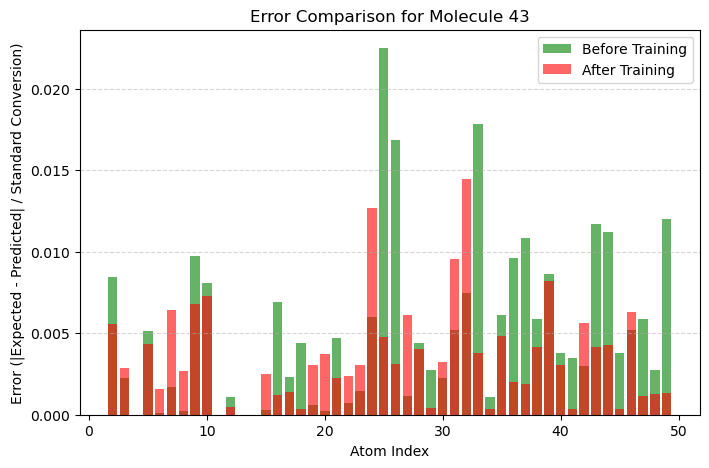


Molecule: 107
Atom indices in first dataset: [1, 2, 3, 4, 5, 6, 13, 14, 15, 16, 17, 18, 19, 20, 21]
Atom indices in second dataset: [1, 2, 3, 4, 5, 6, 13, 14, 15, 16, 17, 18, 19, 20, 21]


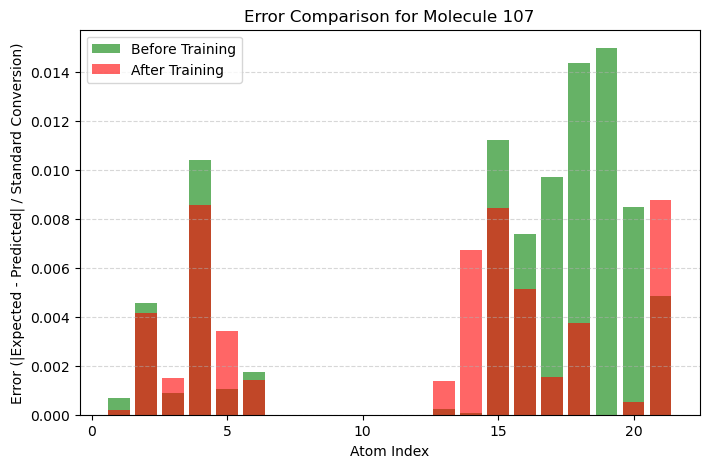


Molecule: 89
Atom indices in first dataset: [1, 2, 3, 4, 5, 6, 13, 14, 15, 16, 17, 18, 19]
Atom indices in second dataset: [1, 2, 3, 4, 5, 6, 13, 14, 15, 16, 17, 18, 19]


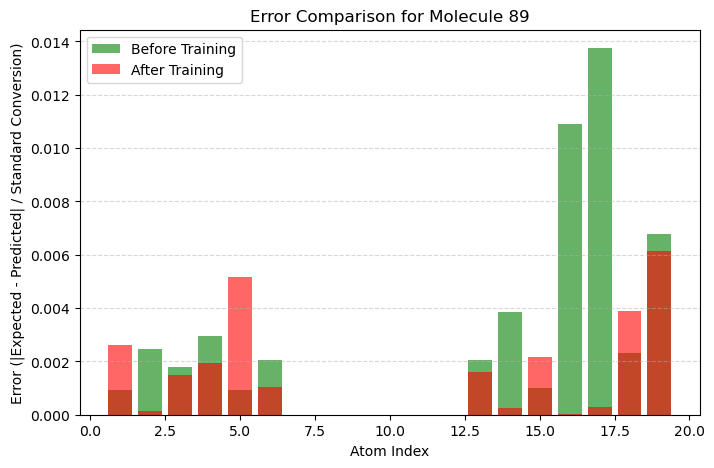


Molecule: 111
Atom indices in first dataset: [2, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
Atom indices in second dataset: [2, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]


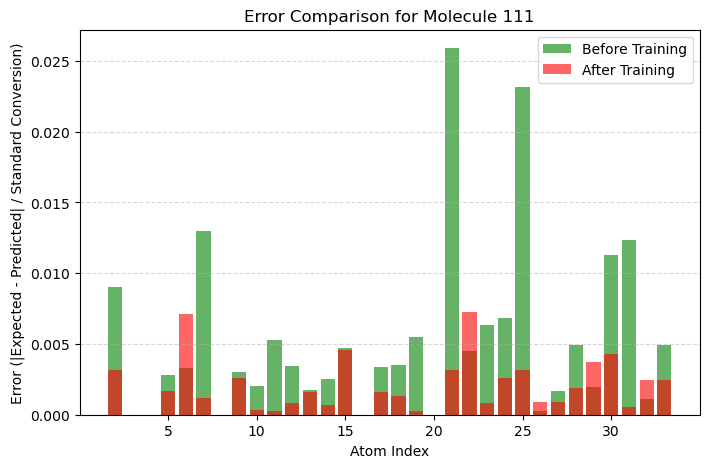

In [ ]:
## rmse is wrong, or value on vertical scale are wrong, 4% error is quite low, error in prediction, dividing by dft valule 
## actual ppm error on bottom line, divide by expected range, not expected results, range of ppm is roughly 10, carbon divide by 200
## Divide by 10 for proton and 200 for carbon, 
## Impression should be 2% ish, 4 and 8 are low numbers, two errors of 4 and 8, rmse of that it isn't 50, should be about 6.something, 


## RMsE should be lower than the highest error, 
## Average of the valesu, should be between lowest and highest error. mean of the squared errors, 
## RMse are miscalucated, average error only droped 2 or 3 fold, rmse should drop more than 10 fold. 

## Could try training incremnetally with 5, 10, 20 molecules, how many does it need to, 
## Add a smaller set of molecules to it, how many molecules, half the amount of molecules, then quarter this, is 15 enough, 
## Is half enough, see how error decreases, 
## Which 15 do you add, choose the most dissimlar, if only time to do one machine, same statistics to the 15 machine compared to the 75 machine
## Average devitation goes down, 1 molecule might be problem, show it's not about average error, 8 do much better, but one does the 
## Source of the error, 
## means you can show you answered another whole question, show is it amount of molecules that it can do, so need to find the most disimilar 
## training molecules set. 




import os
import pandas as pd
import matplotlib.pyplot as plt

# Paths to folders
exp_folder = r"C:\Project_code\OUTPUT\10%"
pred_folder = r"C:\Project_code\OUTPUT\Impressioned"

# Function to extract NMREDATA_ASSIGNMENT data and determine the type for each shift
def extract_assignment_data(file_path):
    """Extracts NMREDATA_ASSIGNMENT data from an SDF file and determines the type for each shift."""
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    start_idx = next((i for i, line in enumerate(lines) if "> <NMREDATA_ASSIGNMENT>" in line), None)
    end_idx = next((i for i, line in enumerate(lines) if "> <NMREDATA_J>" in line), None)

    if start_idx is None or end_idx is None:
        return []

    data_lines = lines[start_idx + 1:end_idx]
    
    extracted_data = []
    for line in data_lines:
        values = line.strip().strip("\\").split(",")
        if len(values) >= 4:  # Check
            try:
                atom_index = int(values[0].strip())  
                shift = float(values[1].strip())  
                atom_type = int(values[2].strip())  # The value for H or C
                
                # Determine divisor
                if atom_type == 6:
                    divisor = 200  # C
                elif atom_type == 1:
                    divisor = 10   # H
                else:
                    divisor = 1   # Default (no adjustment if unknown type)

                extracted_data.append((atom_index, shift, divisor))
            except ValueError:
                continue  

    return extracted_data

# Get list molecule files in experimental folder
exp_files = [f for f in os.listdir(exp_folder) if f.endswith(".sdf")]

# Store data for plotting
plot_data = {}

for exp_file in exp_files:
    pred_file = exp_file.replace(".nmredata.sdf", ".nmredata_predicted.sdf")
    pred_path = os.path.join(pred_folder, pred_file)
    exp_path = os.path.join(exp_folder, exp_file)

    if not os.path.exists(pred_path):
        print(f"Predicted file missing: {pred_file}")
        continue

    exp_data = extract_assignment_data(exp_path)
    pred_data = extract_assignment_data(pred_path)

    min_length = min(len(exp_data), len(pred_data))

    atom_indices = []
    errors = []

    for i in range(min_length):
        exp_value = exp_data[i][1]
        pred_value = pred_data[i][1]
        divisor = exp_data[i][2]  

        if pred_value != 0.0:
            atom_indices.append(exp_data[i][0] + 1)  # Adjust index
            errors.append(abs((exp_value - pred_value) / divisor))

    # Remove the prefix
    molecule_name = exp_file.replace(".nmredata.sdf", "").replace("molecule_", "")
    plot_data[molecule_name] = (atom_indices, errors)

# Load second dataset
df = pd.read_pickle("TROY_test_predicted_atoms.pkl")

# Filter data
df = df[df["typestr"] != "N"]
df = df[(df["shift"] != 0) & (df["predicted_shift"] != 0)]

# shift difference calculation
def calculate_shift_difference(row):
    if row["typestr"] == "H":
        return abs(row["shift"] - row["predicted_shift"]) / 10
    elif row["typestr"] == "C":
        return abs(row["shift"] - row["predicted_shift"]) / 200
    else:
        return abs(row["shift"] - row["predicted_shift"])

df["shift_error"] = df.apply(calculate_shift_difference, axis=1)
df["atom_index"] += 1

# Get unique molecule names
unique_molecules = df["molecule_name"].unique()

# Debugging: Print molecule names from both datasets
print("Molecules in first dataset:", list(plot_data.keys()))
print("Molecules in second dataset:", list(unique_molecules))

# Generate combined plots
for molecule in unique_molecules:
    subset = df[df["molecule_name"] == molecule]
    
    molecule_in_first_dataset = str(molecule)  # Convert to string for matching
    if molecule_in_first_dataset in plot_data:
        atom_indices_exp, errors_exp = plot_data[molecule_in_first_dataset]

        # Debugging: Print atom indices to check alignment
        print(f"\nMolecule: {molecule_in_first_dataset}")
        print("Atom indices in first dataset:", atom_indices_exp)
        print("Atom indices in second dataset:", list(subset["atom_index"]))

        plt.figure(figsize=(8, 5))
        
        plt.bar(atom_indices_exp, errors_exp, color="green", alpha=0.6, label="Before Training")
        plt.bar(subset["atom_index"], subset["shift_error"], color="red", alpha=0.6, label="After Training")

        plt.xlabel("Atom Index")
        plt.ylabel("Error (|Expected - Predicted| / Standard Conversion)")
        plt.title(f"Error Comparison for Molecule {molecule_in_first_dataset}")
        plt.legend()
        plt.grid(axis="y", linestyle="--", alpha=0.5)
        
        plt.savefig(f"{molecule_in_first_dataset}_combined_error_plot.png")
        plt.show()
    else:
        print(f"{molecule_in_first_dataset} not found in first dataset.")




RMSE before training for molecule 8: 0.0050
RMSE after training for molecule 8: 0.0029


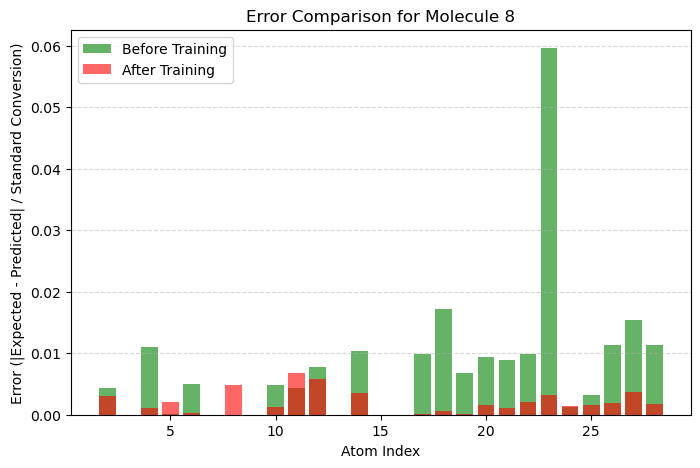

In [ ]:
import numpy as np
import pandas as pd

# Function to calculate RMSE
def calculate_rmse(exp_shifts, pred_shifts, divisor):
    ## Square each error
    squared_errors = [((exp - pred)/ divisor) ** 2 for exp, pred in zip(exp_shifts, pred_shifts)]
    ## Average the squares
    mean_squared_error = np.mean(squared_errors)
    ## Square the average
    return np.sqrt(mean_squared_error) 


# RMSE calculation for each molecule
for molecule in molecule_name:
    subset = df[df["molecule_name"] == molecule]
    
    molecule_in_first_dataset = str(molecule)  # Convert to string for matching
    if molecule_in_first_dataset in plot_data:
        atom_indices_exp, errors_exp = plot_data[molecule_in_first_dataset]

        # Empty values before calculating RMSE
        exp_shifts = []
        pred_shifts = []
        divisors = []

        for i in range(len(atom_indices_exp)):
            # Find the matching atom in the dataframe subset
            matching_row = subset[subset["atom_index"] == atom_indices_exp[i]]
            if not matching_row.empty:
                exp_shifts.append(matching_row["shift"].iloc[0])  # Corresponding experimental shift
                pred_shifts.append(matching_row["predicted_shift"].iloc[0])  # Corresponding predicted shift
                
                # Determine divisor based on atom type
                atom_type = matching_row["typestr"].iloc[0]
                if atom_type == "C":
                    divisors.append(200)  # Carbon
                elif atom_type == "H":
                    divisors.append(10)   # Hydrogen
                else:
                    divisors.append(1)   # Just in case

        # Calculate RMSE before training (experimental)
        rmse_before = calculate_rmse(exp_shifts, pred_shifts, np.mean(divisors))

        # Calculate RMSE after training (predicted shifts from the dataframe)
        rmse_after = np.sqrt(np.mean(subset["shift_error"]**2))

        print(f"RMSE before training for molecule {molecule_in_first_dataset}: {rmse_before:.4f}")
        print(f"RMSE after training for molecule {molecule_in_first_dataset}: {rmse_after:.4f}")

        # Plotting the errors
        plt.figure(figsize=(8, 5))
        plt.bar(atom_indices_exp, errors_exp, color="green", alpha=0.6, label="Before Training")
        plt.bar(subset["atom_index"], subset["shift_error"], color="red", alpha=0.6, label="After Training")

        plt.xlabel("Atom Index")
        plt.ylabel("Error (|Expected - Predicted| / Standard Conversion)")
        plt.title(f"Error Comparison for Molecule {molecule_in_first_dataset}")
        plt.legend()
        plt.grid(axis="y", linestyle="--", alpha=0.5)
        
        plt.savefig(f"{molecule_in_first_dataset}_combined_error_plot.png")
        plt.show()
    else:
        print(f"Warning: {molecule_in_first_dataset} not found in first dataset.")


# Error which has appeared didn't used to be here

In [27]:
from math import sqrt

#df['square_error'] = df['shift_error'] **2

df_12 = df[df['molecule_name'] == '12']
sqrt(df_12['square_error'].mean())

KeyError: 'square_error'

In [ ]:
# Ensure molecule_name is treated as a string
df["molecule_name"] = df["molecule_name"].astype(str)

# Now filter for molecule_name == "12"
molecule_12_df = df[df["molecule_name"] == "12"]

# Display the result
print(molecule_12_df)

    index molecule_name  atom_index typestr  typeint       x       y       z  \
39     39            12           1       C        6  0.8692  0.2175  0.0263   
43     43            12           5       C        6  3.3273 -0.2839  0.1499   
44     44            12           6       C        6  3.7224  0.3782  1.3087   
45     45            12           7       C        6  5.0755  0.5694  1.5432   
46     46            12           8       C        6  6.0316  0.1001  0.6526   
47     47            12           9       C        6  5.6481 -0.5783 -0.5026   
48     48            12          10       C        6  4.2888 -0.7554 -0.7423   
49     49            12          11       C        6 -1.5990 -0.0677 -0.3194   
50     50            12          12       C        6 -1.9506  1.1414 -0.9391   
51     51            12          13       C        6 -3.2763  1.5377 -1.0355   
52     52            12          14       C        6 -2.5898 -0.9011  0.1896   
53     53            12          15     

In [ ]:

## Error after training

df['abs_shift_err'] = abs(df['shift_error'])

for mol in df.molecule_name.unique():
    mol_df = df[df['molecule_name'] == mol]
    rmse = sqrt(mol_df['square_error'].mean())

    #mae stuff
    mae = mol_df['abs_shift_err'].mean()
    print("After training errors")
    print(f'{mol} MAE: {mae}')
    print(f'{mol} RMSE: {rmse}')


KeyError: 'square_error'

RMSE before training for molecule 8: 0.0050
RMSE after training for molecule 8: 0.0029
MAE before training for molecule 8: 0.0028
MAE after training for molecule 8: 0.0023


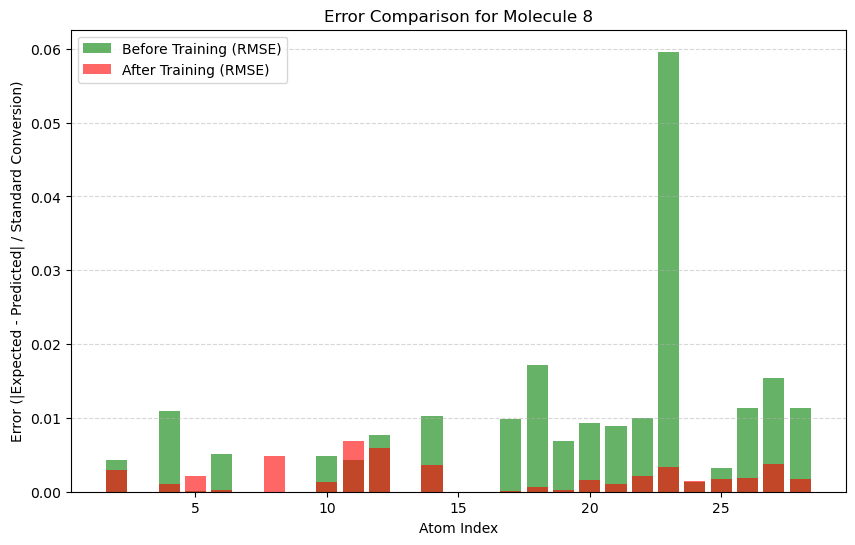

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate RMSE
def calculate_rmse(exp_shifts, pred_shifts, divisor):
    squared_errors = [((exp - pred) / divisor) ** 2 for exp, pred in zip(exp_shifts, pred_shifts)]
    mean_squared_error = np.mean(squared_errors)
    return np.sqrt(mean_squared_error)

# Function to calculate MAE
def calculate_mae(exp_shifts, pred_shifts, divisor):
    absolute_errors = [abs((exp - pred) / divisor) for exp, pred in zip(exp_shifts, pred_shifts)]
    total_error = np.sum(absolute_errors)  # Sum all errors for the molecule
    return total_error / len(absolute_errors)  # Divide by number of errors (atoms)

# MAE and RMSE calculation for each molecule
for molecule in molecule_name:
    subset = df[df["molecule_name"] == molecule]
    
    molecule_in_first_dataset = str(molecule)  # Convert to string for matching
    if molecule_in_first_dataset in plot_data:
        atom_indices_exp, errors_exp = plot_data[molecule_in_first_dataset]

        # Empty values before calculating
        exp_shifts = []
        pred_shifts = []
        divisors = []

        for i in range(len(atom_indices_exp)):
            # Find the matching atom in the dataframe subset
            matching_row = subset[subset["atom_index"] == atom_indices_exp[i]]
            if not matching_row.empty:
                exp_shifts.append(matching_row["shift"].iloc[0])  # Experimental shift
                pred_shifts.append(matching_row["predicted_shift"].iloc[0])  # Predicted shift
                
                # Determine divisor based on atom type
                atom_type = matching_row["typestr"].iloc[0]
                if atom_type == "C":
                    divisors.append(200)  # Carbon
                elif atom_type == "H":
                    divisors.append(10)   # Hydrogen
                else:
                    divisors.append(1)    # Default case

        if exp_shifts and pred_shifts:
            # Calculate RMSE before training (experimental)
            rmse_before = calculate_rmse(exp_shifts, pred_shifts, np.mean(divisors))

            # Calculate RMSE after training (predicted shifts from the dataframe)
            rmse_after = np.sqrt(np.mean(subset["shift_error"] ** 2))

            # Calculate MAE before training by summing errors for this molecule
            mae_before = calculate_mae(exp_shifts, pred_shifts, np.mean(divisors))

            # Calculate MAE after training
            mae_after = np.sum(abs(subset["shift_error"])) / len(subset)

            print(f"RMSE before training for molecule {molecule_in_first_dataset}: {rmse_before:.4f}")
            print(f"RMSE after training for molecule {molecule_in_first_dataset}: {rmse_after:.4f}")
            print(f"MAE before training for molecule {molecule_in_first_dataset}: {mae_before:.4f}")
            print(f"MAE after training for molecule {molecule_in_first_dataset}: {mae_after:.4f}")

            # Plotting the errors
            plt.figure(figsize=(10, 6))
            plt.bar(atom_indices_exp, errors_exp, color="green", alpha=0.6, label="Before Training (RMSE)")
            plt.bar(subset["atom_index"], subset["shift_error"], color="red", alpha=0.6, label="After Training (RMSE)")
            plt.xlabel("Atom Index")
            plt.ylabel("Error (|Expected - Predicted| / Standard Conversion)")
            plt.title(f"Error Comparison for Molecule {molecule_in_first_dataset}")
            plt.legend()
            plt.grid(axis="y", linestyle="--", alpha=0.5)
            plt.savefig(f"{molecule_in_first_dataset}_combined_error_plot.png")
            plt.show()


    else:
        print(f"Warning: {molecule_in_first_dataset} not found in first dataset.")
